##Parte 1









###ejercicio 2

####A

In [104]:
#prmero importamos lo necesario
import pandas as pd
import os

In [105]:
#os.chdir(r"C:\Users\ADOLFO\Documents\GitHub\BigDataUBA-Grupo-1\TP2")

In [113]:
# Cargamos las 2 eph
df_1= pd.read_stata("usu_individual_T105.dta")
df_2 = pd.read_excel("usu_individual_T125.xlsx")

In [174]:
#creamos una copia
df_1_a= df_1.copy()
df_2_a= df_2.copy()

In [175]:
# Reemplazamos variables categroricas en texto por numero
df_1_a["region"] = df_1_a["region"].replace({"Gran Buenos Aires":1})
df_1_a["ch04"] = df_1_a["ch04"].replace({"Varón":1,"Mujer":2})
df_1_a["ch06"] = df_1_a["ch06"].replace({"Menos de 1 año":-1,"98 y más años":98})
df_1_a["ch07"] = df_1_a["ch07"].replace({"Unido":1,"Casado":2,"Separado o divorciado":3,"Viudo":4,"Soltero":5,"Ns./Nr.":0})
df_1_a["ch08"] = df_1_a["ch08"].replace({"Obra social (incluye PAMI)":1,"Mutual/Prepaga/Servicio de emergencia":2,"Planes y seguros públicos":3,"No paga ni le descuentan":4,
                                         "Ns./Nr.":9,"Obra social y mutual/prepaga/servicio de emergencia":12,"Obra social y planes y seguros públicos":13,
                                         "Mutual/prepaga/servicio de emergencia/planes y seguros públi":23,
                                         "Obra social, mutual/prepaga/servicio de emergencia y planes":123})
df_1_a["nivel_ed"] = df_1_a["nivel_ed"].replace({"Primaria Incompleta (incluye educación especial)":1,"Primaria Completa":2,"Secundaria Incompleta":3,"Secundaria Completa":4,
                                                 "Superior Universitaria Incompleta":5,"Superior Universitaria Completa":6,"Sin instrucción":7,"Ns./ Nr.":9})
df_1_a["estado"] = df_1_a["estado"].replace({"Entrevista individual no realizada (no respuesta al cuestion":0,"Ocupado":1,"Desocupado":2,"Inactivo":3,"Menor de 10 años":4})
df_1_a["cat_inac"] = df_1_a["cat_inac"].replace({"Jubilado/pensionado":1,"Rentista":2,"Estudiante":3,"Ama de casa":4,"Menor de 6 años":5,"Discapacitado":6,"Otros":7})
df_1_a["pp10a"] = df_1_a["pp10a"].replace({"...menos de 1 mes?":1,"...de 1 a 3 meses?":2,"...más de 3 a 6 meses?":3,"...más de 6 a 12 meses?":4,"...más de 1 año?":5})
df_1_a["pp03j"] = df_1_a["pp03j"].replace({"Sí":1,"No":2,"Ns./Nr.":9})
df_1_a["pp04a"] = df_1_a["pp04a"].replace({"...estatal?":1,"...privada?":2,"...de otro tipo? (especificar)":3,"Ns./Nr.":0})
   #df_2
df_2_a["PP10A"] = df_2_a["PP10A"].fillna(0)
df_2_a["PP03J"] = df_2_a["PP03J"].fillna(9)
df_2_a["PP04A"] = df_2_a["PP04A"].fillna(0)
df_2_a["P47T"] = df_2_a["P47T"].fillna(-9)


/tmp/ipython-input-3455944364.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_1_a["region"] = df_1_a["region"].replace({"Gran Buenos Aires":1})
/tmp/ipython-input-3455944364.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1_a["ch04"] = df_1_a["ch04"].replace({"Varón":1,"Mujer":2})
/tmp/ipython-input-3455944364.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, u

In [176]:
# En el primero df tenemos los nombres en minuscula, por lo cual primero renombramos las columnas de interes a mayuscula
df_1_a1=df_1_a.copy() #para no alterar la celda anterior al cambiar los nombres
df_1_a1.columns = df_1_a1.columns.str.upper()

In [177]:
# Vemos los cambio
df_1_a1

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,125098,1.0,1.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1017.0,...,08,,07,08,,05,0.0,0.0,0.0,00000
1,125188,1.0,1.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,40020
2,125188,1.0,2.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
3,125188,1.0,3.0,0.0,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
4,125242,1.0,1.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1103.0,...,09,,09,09,,07,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47025,288015,1.0,3.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,129.0,...,09,10,09,,10,07,0.0,0.0,0.0,00000
47026,288015,1.0,4.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,129.0,...,09,10,09,,10,07,0.0,0.0,0.0,00000
47027,288294,1.0,1.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,107.0,...,10,10,09,,10,09,0.0,0.0,0.0,00000
47028,288294,1.0,2.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,107.0,...,10,10,09,,10,09,0.0,0.0,0.0,00000


In [178]:
# Fitramos unicamente los datos para la región seleccionada
df_1_b= df_1_a1[df_1_a1["REGION"] == 1].copy()
df_2_b= df_2_a[df_2_a["REGION"] == 1].copy()

In [208]:
# Seleccionamos las 15 variables de interes
variables_de_interes = ['CODUSU','REGION','ANO4','CH04','CH06','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC','PP10A','PP03J','PP04A','P21','P47T','ITF','IPCF']
df_1_c= df_1_b[variables_de_interes].copy()
df_2_c= df_2_b[variables_de_interes].copy()

In [209]:
# Observamos el tipo de dato almacenado por variable en cada df, para ello armamos un cuadro comparativo
    # Tipos de datos por df
tipos_df1 = df_1_c.dtypes.astype(str)
tipos_df2 = df_2_c.dtypes.astype(str)

In [210]:
    # Creamos el df comparativo
comparativo_datos = pd.DataFrame({
    "df_1_c": tipos_df1[variables_de_interes],
    "df_2_c": tipos_df2[variables_de_interes]
})

In [211]:
    # Usamos las variables como indices de las filas para leer mas facil
comparativo_datos = comparativo_datos.set_index(pd.Index(variables_de_interes))
print(comparativo_datos)

            df_1_c   df_2_c
CODUSU      object   object
REGION    category    int64
ANO4       float64    int64
CH04      category    int64
CH06      category    int64
CH07      category    int64
CH08      category  float64
NIVEL_ED  category    int64
ESTADO    category    int64
CAT_INAC  category    int64
PP10A     category  float64
PP03J     category  float64
PP04A     category  float64
P21        float64    int64
P47T       float64  float64
ITF        float64    int64
IPCF       float64  float64


In [235]:
# Compatibilizamos los tipos de datos en ambas variables
    # codusu: pasamos los datos de df_1 a str
df_1_c['CODUSU'] =df_1_c['CODUSU'].astype(str)
    # region: pasamos los datos de df_1 a int64
df_1_c['REGION'] =df_1_c['REGION'].astype(str).astype(int)
    # ano4: pasamos los datos de df_1 a int64
df_1_c['ANO4'] = df_1_c['ANO4'].astype(int)
    # ch04: pasamos los datos de df_1 a int64
df_1_c['CH04'] = df_1_c['CH04'].astype(int)
    # ch06: pasamos los datos de df_1 a int64
df_1_c['CH06'] = df_1_c['CH06'].astype(int)
    #ch07: pasamos los datos de df_1 a int64
df_1_c['CH07'] = df_1_c['CH07'].astype(int)
    #ch08: pasamos los datos de df_1 a int64
df_1_c['CH08'] = df_1_c['CH08'].astype(int)
    #NIVEL_ED: pasamos los datos de_1 a int64
df_1_c['NIVEL_ED'] = df_1_c['NIVEL_ED'].astype(int)
    #estado: pasamos los datos de df_1 a int64
df_1_c['ESTADO'] = df_1_c['ESTADO'].astype(int)
    #cat_inac: pasamos los datos de df_1 a int64
df_1_c['CAT_INAC'] = df_1_c['CAT_INAC'].astype(int)
    #pp10a: pasamos los datos de df_1 a int64
df_1_c['PP10A'] = df_1_c['PP10A'].astype(int)
    #pp03j: pasamos los datos de df_1 a int64
df_1_c['PP03J'] = df_1_c['PP03J'].astype(int)
    #pp04a: pasamos los datos de df_1 a int64
df_1_c['PP04A'] = df_1_c['PP04A'].astype(int)
    #p21: pasamos los datos de df_1 a int64
df_1_c['P21'] = df_1_c['P21'].astype(int)
    #p47t: pasamos los datos de df_1 a int64
df_1_c['P47T'] = df_1_c['P47T'].astype(int)
    #itf: pasamos los datos de df_1 a int64
df_1_c['ITF'] = df_1_c['ITF'].astype(int)
    #ipcf: pasamos los datos de df_1 a int64
df_1_c['IPCF'] = df_1_c['IPCF'].astype(int)


 #df_2
    #ch08: pasamos los datos de df_2 a int64
df_2_c['CH08'] = df_2_c['CH08'].astype(int)
    #pp10a: pasamos los datos de df_2 a int64
df_2_c['PP10A'] = df_2_c['PP10A'].astype(int)
    #pp03j: pasamos los datos de df_2 a int64
df_2_c['PP03J'] = df_2_c['PP03J'].astype(int)
    #pp04a: pasamos los datos de df_2 a int64
df_2_c['PP04A'] = df_2_c['PP04A'].astype(int)
    #p47t: pasamos los datos de df_2 a int64
df_2_c['P47T'] = df_2_c['P47T'].astype(int)
    #ipcf: pasamos los datos de df_2 a int64
df_2_c['IPCF'] = df_2_c['IPCF'].astype(int)






In [236]:
# Corroboramos que ahora todos los tipos de datos sean iguales

tipos_df1_a = df_1_c.dtypes.astype(str)
tipos_df2_a= df_2_c.dtypes.astype(str)

    # Creamos el df comparativo
comparativo_datos_a = pd.DataFrame({
    "df_1_c": tipos_df1_a,
    "df_2_c": tipos_df2_a
})
    # Usamos las variables como indices de las filas para leer mas facil
comparativo_datos_a = comparativo_datos_a.set_index(pd.Index(variables_de_interes))
print("Vemos los datos compatibilizados")
print(comparativo_datos_a)

Vemos los datos compatibilizados
          df_1_c  df_2_c
CODUSU    object  object
REGION     int64   int64
ANO4       int64   int64
CH04       int64   int64
CH06       int64   int64
CH07       int64   int64
CH08       int64   int64
NIVEL_ED   int64   int64
ESTADO     int64   int64
CAT_INAC   int64   int64
PP10A      int64   int64
PP03J      int64   int64
PP04A      int64   int64
P21        int64   int64
P47T       int64   int64
ITF        int64   int64
IPCF       int64   int64


In [185]:
# en este paso adjuntamos al final los datos de las dos base de datos
df_comp= pd.concat([df_1_c, df_2_c])
print(df_comp.shape)
df_comp

(16665, 17)


,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,PP10A,PP03J,PP04A,P21,P47T,ITF,IPCF
0,125098,1,2005,1,80,4,1,3,3,1,0,0,0,0,583,583,583
1,125188,1,2005,1,26,2,4,4,1,0,0,1,2,300,450,450,150
2,125188,1,2005,2,27,2,4,6,3,4,0,0,0,0,0,450,150
3,125188,1,2005,2,-1,5,4,7,4,5,0,0,0,0,0,450,150
4,125242,1,2005,2,71,4,1,2,3,1,0,0,0,0,855,855,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45259,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,49,2,1,3,1,0,0,2,2,700000,700000,0,0
45260,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,51,2,1,6,1,0,0,9,2,500000,500000,0,0
45261,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,22,5,1,6,1,0,0,1,2,-9,-9,0,0
45262,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,26,5,1,3,3,3,0,9,0,0,0,0,0


In [161]:
# Corroboramos que se hayan unido correctamente ambas base
print(df_1_c.shape)
print(df_2_c.shape)
print(df_comp.shape)


(9484, 17)
(7181, 17)
(16665, 17)


####B

In [162]:
#imporatmos las expanciones necesarias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [344]:
#hacemos una copia para no alterar la base original
df_comp_1 = df_comp.copy()

In [345]:
# en este paso tranformaremos todas las columnas donde antes convertimos el NaN(valores faltantes) en numeros de vuelta en Nan
cols = ["CH07","CH08","NIVEL_ED","PP03J","PP10A","PP04A","P47T"]
df_comp_1[cols] = df_comp_1[cols].replace([9, 0], np.nan)

print(df_comp_1)

                              CODUSU  REGION  ANO4  CH04  CH06  CH07  CH08  \
0                           125098         1  2005     1    80   4.0   1.0   
1                           125188         1  2005     1    26   2.0   4.0   
2                           125188         1  2005     2    27   2.0   4.0   
3                           125188         1  2005     2    -1   5.0   4.0   
4                           125242         1  2005     2    71   4.0   1.0   
...                              ...     ...   ...   ...   ...   ...   ...   
45259  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     1    49   2.0   1.0   
45260  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2    51   2.0   1.0   
45261  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2    22   5.0   1.0   
45262  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     1    26   5.0   1.0   
45263  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2     6   5.0   1.0   

       NIVEL_ED  ESTADO  CAT_INAC  PP10A  PP03J  PP04A     P21 

In [346]:
# creamos copia para no afactar la df
df_comp_1_a = df_comp_1.copy()

In [347]:
# Contar valores faltantes por año y columna
df_comp_1_a= df_comp_1_a.groupby('ANO4').apply(lambda x: x.notnull().mean() * 100)

/tmp/ipython-input-2025000446.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_comp_1_a= df_comp_1_a.groupby('ANO4').apply(lambda x: x.notnull().mean() * 100)


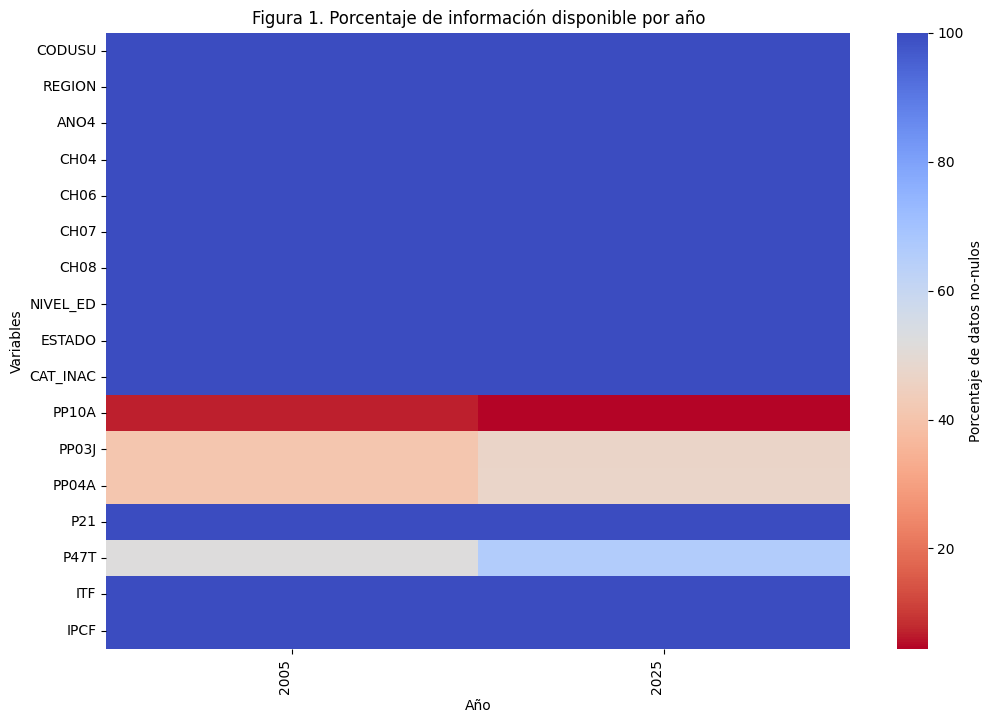

In [348]:
# en este paso desiñaremos como se compone la figura de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_comp_1_a.T, annot=False, cmap="coolwarm_r",cbar_kws={'label': 'Porcentaje de datos no-nulos'})
plt.title("Figura 1. Porcentaje de información disponible por año")
plt.xlabel("Año")
plt.xticks(rotation=90, ha='right')
plt.ylabel("Variables")
plt.yticks(rotation=0)
plt.show()

####C

In [353]:
#creamos una copia para no alterar la base datos
df_comp_2= df_comp.copy()

In [354]:
# coregiremos las varibles que tienen volores sinsentido y los tranformaremos NaN, la cuales en la eph se representan como -9,-8,-7,0 y 9
vars_interes_1=['CH04','CH06','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC','PP03J','PP10A','PP04A']
vars_interes_2=['P21','P47T','ITF','IPCF']
df_comp_2[vars_interes_1] = df_comp_2[vars_interes_1].replace([-9, -8, -7,0,9], np.nan)
df_comp_2[vars_interes_2] = df_comp_2[vars_interes_2].replace([-9, -8, -7], np.nan)
df_comp_2

,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,PP10A,PP03J,PP04A,P21,P47T,ITF,IPCF
0,125098,1,2005,1,80.0,4.0,1.0,3,3.0,1.0,NaN,NaN,NaN,0.0,583.0,583,583
1,125188,1,2005,1,26.0,2.0,4.0,4,1.0,NaN,NaN,1.0,2.0,300.0,450.0,450,150
2,125188,1,2005,2,27.0,2.0,4.0,6,3.0,4.0,NaN,NaN,NaN,0.0,0.0,450,150
3,125188,1,2005,2,-1.0,5.0,4.0,7,4.0,5.0,NaN,NaN,NaN,0.0,0.0,450,150
4,125242,1,2005,2,71.0,4.0,1.0,2,3.0,1.0,NaN,NaN,NaN,0.0,855.0,855,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45259,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,49.0,2.0,1.0,3,1.0,NaN,NaN,2.0,2.0,700000.0,700000.0,0,0
45260,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,51.0,2.0,1.0,6,1.0,NaN,NaN,NaN,2.0,500000.0,500000.0,0,0
45261,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,22.0,5.0,1.0,6,1.0,NaN,NaN,1.0,2.0,NaN,NaN,0,0
45262,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,26.0,5.0,1.0,3,3.0,3.0,NaN,NaN,NaN,0.0,0.0,0,0


In [355]:
#ver cuantas valores NaN tiene cada variavle
print(df_comp_2.isna().sum())

CODUSU          0
REGION          0
ANO4            0
CH04            0
CH06          257
CH07            4
CH08           35
NIVEL_ED        0
ESTADO         51
CAT_INAC     8321
PP10A       15688
PP03J        9418
PP04A        9383
P21           919
P47T         1353
ITF             0
IPCF            0
dtype: int64


In [356]:
#  ademas corrigiremos valores que no tienen sentido, cuando cumplen ciertas condiciones
df_comp_2.loc[(df_comp_2['ITF'] == 0) & ((df_comp_2['P47T'] > 0) | (df_comp_2["ESTADO"]==1)), 'ITF'] = np.nan #la variable "itf"(ingreso total familia) es igual a 0 sera NaN si la variable "p47t"(ingreso total de ocupacion como no ocupacion) es mayor a "0", o cuando la variable "estado" es igual a 1(ocupado)
df_comp_2.loc[(df_comp_2['IPCF'] == 0) & ((df_comp_2['P47T'] > 0) | (df_comp_2["ESTADO"]==1)), 'IPCF'] = np.nan #la variable "ipcf"(ingreso per capital familia) es igual a 0 sera NaN si la variable "p47t"(ingreso total de ocupacion como no ocupacion) es mayor a "0", o cuando la variable "estado" es igual a 1(ocupado)

In [357]:
#ver cuantas valores NaN tiene cada variavle, con la nueva condicion
print(df_comp_2.isna().sum())

CODUSU          0
REGION          0
ANO4            0
CH04            0
CH06          257
CH07            4
CH08           35
NIVEL_ED        0
ESTADO         51
CAT_INAC     8321
PP10A       15688
PP03J        9418
PP04A        9383
P21           919
P47T         1353
ITF          1702
IPCF         1702
dtype: int64


In [359]:
# hacemos una copia para no alterar el df
df_comp_2_a= df_comp_2.copy()

In [360]:
#ahora vremos como seria el grafico de heatmap con la correcion de las variables incoerentes
   # Contar valores faltantes por año y columna
df_comp_2_a = df_comp_2_a.groupby('ANO4').apply(lambda x: x.notnull().mean() * 100)

/tmp/ipython-input-46260248.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_comp_2_a = df_comp_2_a.groupby('ANO4').apply(lambda x: x.notnull().mean() * 100)


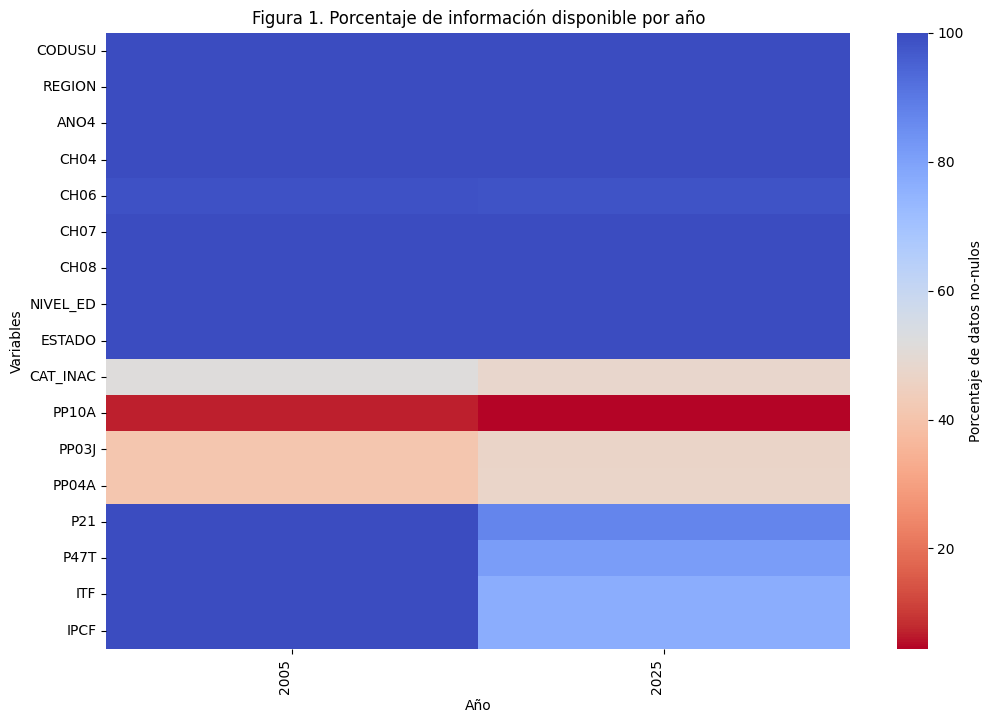

In [361]:
   # en este paso desiñaremos como se compone la figura de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_comp_2_a.T, annot=False, cmap="coolwarm_r",cbar_kws={'label': 'Porcentaje de datos no-nulos'})
plt.title("Figura 1. Porcentaje de información disponible por año")
plt.xlabel("Año")
plt.xticks(rotation=90, ha='right')
plt.ylabel("Variables")
plt.yticks(rotation=0)
plt.show()

####D

In [306]:
# Cargamos las 2 eph de hogares
df_3= pd.read_stata("usu_hogar_T105.dta")
df_4 = pd.read_excel("usu_hogar_T125.xlsx")

In [308]:
df_3_a= df_3.copy()
df_4_a= df_4.copy()

In [309]:
# Reemplazamos variables categroricas en texto por numero Gran Buenos Aires
df_3_a["region"] = df_3_a["region"].replace({"Gran Buenos Aires":1})

/tmp/ipython-input-2670206329.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_3_a["region"] = df_3_a["region"].replace({"Gran Buenos Aires":1})


In [310]:
# En el tercer df tenemos los nombres en minuscula, por lo cual primero renombramos las columnas de interes a mayuscula
df_3_a1=df_3_a.copy() #para no alterar la celda anterior al cambiar los nombres
df_3_a1.columns = df_3_a1.columns.str.upper()

In [315]:
# Fitramos unicamente los datos para la región seleccionada
df_3_b= df_3_a1[df_3_a1["REGION"] == 1].copy()
df_4_b= df_4_a[df_4_a["REGION"] == 1].copy()

In [316]:
# Seleccionamos las 5 variables de interes
variables_de_interes_1 = ["CODUSU","IV1", "IV2", "IV6", "IV8" , "II8"]
df_3_c= df_3_b[variables_de_interes_1].copy()
df_4_c= df_4_b[variables_de_interes_1].copy()

In [317]:
# Observamos el tipo de dato almacenado por variable en cada df, para ello armamos un cuadro comparativo
    # Tipos de datos por df
tipos_df3 = df_3_c.dtypes.astype(str)
tipos_df4 = df_4_c.dtypes.astype(str)

In [318]:
    # Creamos el df comparativo
comparativo_datos_1 = pd.DataFrame({
    "df_3_c": tipos_df3[variables_de_interes_1],
    "df_4_c": tipos_df4 [variables_de_interes_1]
})

In [319]:
    # Usamos las variables como indices de las filas para leer mas facil
comparativo_datos_1= comparativo_datos_1.set_index(pd.Index(variables_de_interes_1))
print(comparativo_datos_1)

          df_3_c  df_4_c
CODUSU    object  object
IV1     category   int64
IV2     category   int64
IV6     category   int64
IV8     category   int64
II8     category   int64


In [320]:
#observemos que variables unicas hay en cada df
for col in df_3_c.columns:
    print(f"Columna '{col}': {df_3_c[col].unique()}")

Columna 'CODUSU': ['125098  ' '125188  ' '125242  ' ... '287998  ' '288150  ' '288167  ']
Columna 'IV1': ['Departamento', 'Casa', 'Pieza en hotel/pensión', 'Pieza de inquilinato', 'Otro', 'Local no construido para habitación']
Categories (6, object): ['Casa' < 'Departamento' < 'Pieza de inquilinato' <
                         'Pieza en hotel/pensión' < 'Local no construido para habitación' < 'Otro']
Columna 'IV2': [3.0, 2.0, 7.0, 5.0, 4.0, ..., 'Ns./Nr.', 10.0, 12.0, 31.0, 11.0]
Length: 13
Categories (15, object): [1.0 < 2.0 < 3.0 < 4.0 ... 12.0 < 21.0 < 31.0 < 'Ns./Nr.']
Columna 'IV6': ['Por cañería dentro de la vivienda', 'Fuera de la vivienda pero dentro del terreno', 'Fuera del terreno', 0.0]
Categories (5, object): [0.0 < 'Por cañería dentro de la vivienda' <
                         'Fuera de la vivienda pero dentro del terreno' < 'Fuera del terreno' < 'Ns./Nr.']
Columna 'IV8': ['Sí', 'No']
Categories (3, object): ['Sí' < 'No' < 'Ns./Nr.']
Columna 'II8': ['Gas de red', 0.0, 'Gas 

In [321]:
#observemos que variables unicas hay en cada df
for col in df_4_c.columns:
    print(f"Columna '{col}': {df_4_c[col].unique()}")

Columna 'CODUSU': ['TQRMNOPVSHJLMTCDEIIAD00872684' 'TQRMNORTVHMOLNCDEIJAH00877911'
 'TQRMNOPSXHLMLMCDEIJAH00855495' ... 'TQRMNORVUHJLMTCDEIIAD00874347'
 'TQRMNOPXYHJMNMCDEIIAD00875182' 'TQRMNOTUUHKMOLCDEIIAD00882513']
Columna 'IV1': [2 1 3 6 4 5]
Columna 'IV2': [3 2 4 5 1 7 6 8 9]
Columna 'IV6': [1 2 3]
Columna 'IV8': [1 2]
Columna 'II8': [1 2 4 0 3]


In [322]:
#copia para no alterara el df anterior
df_3_c_1= df_3_c.copy()
df_4_c_1= df_4_c.copy()

In [323]:
# Reemplazamos variables categroricas en texto por numero en el df3 y unificar los df en un solo tipo de varible
df_3_c_1["IV1"] = df_3_c_1["IV1"].replace({'Departamento':2, 'Casa':1, 'Pieza en hotel/pensión':4, 'Pieza de inquilinato':3, 'Otro':6, 'Local no construido para habitación':5})
df_3_c_1['IV2']=  df_3_c_1['IV2'].replace({'Ns./Nr.':0})
df_3_c_1['IV6']=  df_3_c_1['IV6'].replace({'Ns./Nr.':0,'Por cañería dentro de la vivienda':1, 'Fuera de la vivienda pero dentro del terreno':2, 'Fuera del terreno':3})
df_3_c_1['IV8']=  df_3_c_1['IV8'].replace({'Ns./Nr.':0,'No':2, 'Sí':1})
df_3_c_1['II8']=  df_3_c_1['II8'].replace({'Ns./Nr.':0,'Gas de red':1, 'Gas de tubo/garrafa':2, 'Ns./Nr.':0, 'Otro':4, 'Kerosene/leña/carbón':3})


/tmp/ipython-input-1565860162.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_3_c_1["IV1"] = df_3_c_1["IV1"].replace({'Departamento':2, 'Casa':1, 'Pieza en hotel/pensión':4, 'Pieza de inquilinato':3, 'Otro':6, 'Local no construido para habitación':5})
/tmp/ipython-input-1565860162.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_3_c_1["IV1"] = df_3_c_1["IV1"].replace({'Departamento':2, 'Casa':1, 'Pieza en hotel/pensión':4, 'Pieza de inquilinato':3, 'Otro':6, 'Local no construido para habitación':5})
/tmp/ipython-input-1565860162.py:3:

In [324]:
# Compatibilizamos los tipos de datos en ambas variables
    # IV1: pasamos los datos de df_3 a str
df_3_c_1["IV1"] =df_3_c_1["IV1"].astype(int)
    # IV2: pasamos los datos de df_3 a int64
df_3_c_1["IV2"] =df_3_c_1["IV2"].astype(int)
    # IV6: pasamos los datos de df_3 a int64
df_3_c_1["IV6"] =df_3_c_1["IV6"].astype(int)
    # IV8: pasamos los datos de df_3 a int64
df_3_c_1["IV8"] =df_3_c_1["IV8"].astype(int)
    # II8: pasamos los datos de df_3 a int64
df_3_c_1["II8"] =df_3_c_1["II8"].astype(int)

In [325]:
tipos_df3_1 = df_3_c_1.dtypes.astype(str)
tipos_df4_1= df_4_c_1.dtypes.astype(str)

In [326]:
   # Creamos el df comparativo
comparativo_datos_1_a = pd.DataFrame({
    "df_3_c_1": tipos_df3_1[variables_de_interes_1],
    "df_4_c_1": tipos_df4_1[variables_de_interes_1]
})

In [327]:
    # Usamos las variables como indices de las filas para leer mas facil
comparativo_datos_1_a= comparativo_datos_1_a.set_index(pd.Index(variables_de_interes_1))
print(comparativo_datos_1_a)

       df_3_c_1 df_4_c_1
CODUSU   object   object
IV1       int64    int64
IV2       int64    int64
IV6       int64    int64
IV8       int64    int64
II8       int64    int64


In [328]:
# en este paso adjuntamos al final los datos de las dos base de datos
df_comp_hog= pd.concat([df_3_c_1,df_4_c_1])
print(df_comp_hog.shape)
df_comp_hog

(5552, 6)


,CODUSU,IV1,IV2,IV6,IV8,II8
9844,125098,2,3,1,1,1
9845,125188,2,2,1,1,1
9846,125242,2,3,1,1,1
9847,125436,2,7,1,1,1
9848,125533,2,5,1,1,1
...,...,...,...,...,...,...
15959,TQRMNOPWQHKLNNCDEIIAD00859137,2,3,1,1,1
15960,TQRMNOPTRHLLNLCDEIIAD00854903,2,3,1,1,4
15961,TQRMNORVUHJLMTCDEIIAD00874347,2,2,1,1,1
15962,TQRMNOPXYHJMNMCDEIIAD00875182,1,4,1,1,1


In [329]:
# Corroboramos que se hayan unido correctamente ambas base
print(df_3_c_1.shape)
print(df_4_c_1.shape)
print(df_comp_hog.shape)

(2943, 6)
(2609, 6)
(5552, 6)


In [371]:
df_comp_hogs_1= df_comp_hog.copy()

In [372]:
# coregiremos las varibles que tienen volores sinsentido y los tranformaremos NaN, la cuales en la eph se representan como -9,-8,-7,0 y 9
vars_interes_h=["IV1", "IV2", "IV6", "IV8" , "II8"]
df_comp_hogs_1[vars_interes_h] = df_comp_hogs_1[vars_interes_h].replace([0], np.nan)
df_comp_hogs_1

,CODUSU,IV1,IV2,IV6,IV8,II8
9844,125098,2,3.0,1.0,1,1.0
9845,125188,2,2.0,1.0,1,1.0
9846,125242,2,3.0,1.0,1,1.0
9847,125436,2,7.0,1.0,1,1.0
9848,125533,2,5.0,1.0,1,1.0
...,...,...,...,...,...,...
15959,TQRMNOPWQHKLNNCDEIIAD00859137,2,3.0,1.0,1,1.0
15960,TQRMNOPTRHLLNLCDEIIAD00854903,2,3.0,1.0,1,4.0
15961,TQRMNORVUHJLMTCDEIIAD00874347,2,2.0,1.0,1,1.0
15962,TQRMNOPXYHJMNMCDEIIAD00875182,1,4.0,1.0,1,1.0


In [373]:
df_comp_indidual= df_comp_2.copy()
df_comp_hogar= df_comp_hogs_1.copy()

In [385]:
# uniremos las base de datos de individuos con la de hogares
 #union por intersección
df_interseccion = pd.merge(df_comp_indidual,df_comp_hogar ,on="CODUSU", how='inner')
print(df_interseccion)

                              CODUSU  REGION  ANO4  CH04  CH06  CH07  CH08  \
0                           125098         1  2005     1  80.0   4.0   1.0   
1                           125188         1  2005     1  26.0   2.0   4.0   
2                           125188         1  2005     2  27.0   2.0   4.0   
3                           125188         1  2005     2  -1.0   5.0   4.0   
4                           125242         1  2005     2  71.0   4.0   1.0   
...                              ...     ...   ...   ...   ...   ...   ...   
16857  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     1  49.0   2.0   1.0   
16858  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2  51.0   2.0   1.0   
16859  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2  22.0   5.0   1.0   
16860  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     1  26.0   5.0   1.0   
16861  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2   6.0   5.0   1.0   

       NIVEL_ED  ESTADO  CAT_INAC  ...  PP04A       P21      P4

In [387]:
df_interseccion.drop_duplicates(inplace=True)
df_interseccion

,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,...,PP04A,P21,P47T,ITF,IPCF,IV1,IV2,IV6,IV8,II8
0,125098,1,2005,1,80.0,4.0,1.0,3,3.0,1.0,...,NaN,0.0,583.0,583.0,583.0,2,3.0,1.0,1,1.0
1,125188,1,2005,1,26.0,2.0,4.0,4,1.0,NaN,...,2.0,300.0,450.0,450.0,150.0,2,2.0,1.0,1,1.0
2,125188,1,2005,2,27.0,2.0,4.0,6,3.0,4.0,...,NaN,0.0,0.0,450.0,150.0,2,2.0,1.0,1,1.0
3,125188,1,2005,2,-1.0,5.0,4.0,7,4.0,5.0,...,NaN,0.0,0.0,450.0,150.0,2,2.0,1.0,1,1.0
4,125242,1,2005,2,71.0,4.0,1.0,2,3.0,1.0,...,NaN,0.0,855.0,855.0,855.0,2,3.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16857,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,49.0,2.0,1.0,3,1.0,NaN,...,2.0,700000.0,700000.0,NaN,NaN,1,2.0,1.0,1,1.0
16858,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,51.0,2.0,1.0,6,1.0,NaN,...,2.0,500000.0,500000.0,NaN,NaN,1,2.0,1.0,1,1.0
16859,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,22.0,5.0,1.0,6,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,1,2.0,1.0,1,1.0
16860,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,26.0,5.0,1.0,3,3.0,3.0,...,NaN,0.0,0.0,0.0,0.0,1,2.0,1.0,1,1.0


In [377]:
df_interseccion.reset_index(drop=True, inplace=True) # inplace guarda el resultado
df_interseccion

,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,...,PP04A,P21,P47T,ITF,IPCF,IV1,IV2,IV6,IV8,II8
0,125098,1,2005,1,80.0,4.0,1.0,3,3.0,1.0,...,NaN,0.0,583.0,583.0,583.0,2,3.0,1.0,1,1.0
1,125188,1,2005,1,26.0,2.0,4.0,4,1.0,NaN,...,2.0,300.0,450.0,450.0,150.0,2,2.0,1.0,1,1.0
2,125188,1,2005,2,27.0,2.0,4.0,6,3.0,4.0,...,NaN,0.0,0.0,450.0,150.0,2,2.0,1.0,1,1.0
3,125188,1,2005,2,-1.0,5.0,4.0,7,4.0,5.0,...,NaN,0.0,0.0,450.0,150.0,2,2.0,1.0,1,1.0
4,125242,1,2005,2,71.0,4.0,1.0,2,3.0,1.0,...,NaN,0.0,855.0,855.0,855.0,2,3.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,49.0,2.0,1.0,3,1.0,NaN,...,2.0,700000.0,700000.0,NaN,NaN,1,2.0,1.0,1,1.0
16727,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,51.0,2.0,1.0,6,1.0,NaN,...,2.0,500000.0,500000.0,NaN,NaN,1,2.0,1.0,1,1.0
16728,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,22.0,5.0,1.0,6,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,1,2.0,1.0,1,1.0
16729,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,26.0,5.0,1.0,3,3.0,3.0,...,NaN,0.0,0.0,0.0,0.0,1,2.0,1.0,1,1.0


In [389]:
   # ver el totol de Nas
   total_nas = df_interseccion.isna().sum().sum()
print("Total de NAs:", total_nas)

Total de NAs: 49076


In [378]:
 #unir por izquierda
df_izquierdad = pd.merge(df_comp_indidual,df_comp_hogar ,on="CODUSU", how='left')
print(df_izquierdad )

                              CODUSU  REGION  ANO4  CH04  CH06  CH07  CH08  \
0                           125098         1  2005     1  80.0   4.0   1.0   
1                           125188         1  2005     1  26.0   2.0   4.0   
2                           125188         1  2005     2  27.0   2.0   4.0   
3                           125188         1  2005     2  -1.0   5.0   4.0   
4                           125242         1  2005     2  71.0   4.0   1.0   
...                              ...     ...   ...   ...   ...   ...   ...   
16857  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     1  49.0   2.0   1.0   
16858  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2  51.0   2.0   1.0   
16859  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2  22.0   5.0   1.0   
16860  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     1  26.0   5.0   1.0   
16861  TQRMNORWYHKMPRCDEIJAH00860437       1  2025     2   6.0   5.0   1.0   

       NIVEL_ED  ESTADO  CAT_INAC  ...  PP04A       P21      P4

In [380]:
df_izquierdad.reset_index(drop=True, inplace=True) # inplace guarda el resultado
df_izquierdad

,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,...,PP04A,P21,P47T,ITF,IPCF,IV1,IV2,IV6,IV8,II8
0,125098,1,2005,1,80.0,4.0,1.0,3,3.0,1.0,...,NaN,0.0,583.0,583.0,583.0,2,3.0,1.0,1,1.0
1,125188,1,2005,1,26.0,2.0,4.0,4,1.0,NaN,...,2.0,300.0,450.0,450.0,150.0,2,2.0,1.0,1,1.0
2,125188,1,2005,2,27.0,2.0,4.0,6,3.0,4.0,...,NaN,0.0,0.0,450.0,150.0,2,2.0,1.0,1,1.0
3,125188,1,2005,2,-1.0,5.0,4.0,7,4.0,5.0,...,NaN,0.0,0.0,450.0,150.0,2,2.0,1.0,1,1.0
4,125242,1,2005,2,71.0,4.0,1.0,2,3.0,1.0,...,NaN,0.0,855.0,855.0,855.0,2,3.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16857,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,49.0,2.0,1.0,3,1.0,NaN,...,2.0,700000.0,700000.0,NaN,NaN,1,2.0,1.0,1,1.0
16858,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,51.0,2.0,1.0,6,1.0,NaN,...,2.0,500000.0,500000.0,NaN,NaN,1,2.0,1.0,1,1.0
16859,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,22.0,5.0,1.0,6,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,1,2.0,1.0,1,1.0
16860,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,26.0,5.0,1.0,3,3.0,3.0,...,NaN,0.0,0.0,0.0,0.0,1,2.0,1.0,1,1.0


In [390]:
   # ver el totol de Nas
   total_nas = df_izquierdad.isna().sum().sum()
print("Total de NAs:", total_nas)

Total de NAs: 49443


In [381]:
#unir por derecha
df_derecha = pd.merge(df_comp_indidual,df_comp_hogar ,on="CODUSU", how='right')
print(df_derecha)

                              CODUSU  REGION  ANO4  CH04  CH06  CH07  CH08  \
0                           125098         1  2005     1  80.0   4.0   1.0   
1                           125188         1  2005     1  26.0   2.0   4.0   
2                           125188         1  2005     2  27.0   2.0   4.0   
3                           125188         1  2005     2  -1.0   5.0   4.0   
4                           125242         1  2005     2  71.0   4.0   1.0   
...                              ...     ...   ...   ...   ...   ...   ...   
16857  TQRMNOPXYHJMNMCDEIIAD00875182       1  2025     2  57.0   2.0  12.0   
16858  TQRMNOPXYHJMNMCDEIIAD00875182       1  2025     1  27.0   5.0  12.0   
16859  TQRMNOPXYHJMNMCDEIIAD00875182       1  2025     1  20.0   5.0  12.0   
16860  TQRMNOTUUHKMOLCDEIIAD00882513       1  2025     1  68.0   2.0   2.0   
16861  TQRMNOTUUHKMOLCDEIIAD00882513       1  2025     2  63.0   2.0   2.0   

       NIVEL_ED  ESTADO  CAT_INAC  ...  PP04A        P21       

In [382]:
df_derecha.reset_index(drop=True, inplace=True) # inplace guarda el resultado
df_derecha

,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,...,PP04A,P21,P47T,ITF,IPCF,IV1,IV2,IV6,IV8,II8
0,125098,1,2005,1,80.0,4.0,1.0,3,3.0,1.0,...,NaN,0.0,583.0,583.0,583.0,2,3.0,1.0,1,1.0
1,125188,1,2005,1,26.0,2.0,4.0,4,1.0,NaN,...,2.0,300.0,450.0,450.0,150.0,2,2.0,1.0,1,1.0
2,125188,1,2005,2,27.0,2.0,4.0,6,3.0,4.0,...,NaN,0.0,0.0,450.0,150.0,2,2.0,1.0,1,1.0
3,125188,1,2005,2,-1.0,5.0,4.0,7,4.0,5.0,...,NaN,0.0,0.0,450.0,150.0,2,2.0,1.0,1,1.0
4,125242,1,2005,2,71.0,4.0,1.0,2,3.0,1.0,...,NaN,0.0,855.0,855.0,855.0,2,3.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16857,TQRMNOPXYHJMNMCDEIIAD00875182,1,2025,2,57.0,2.0,12.0,6,1.0,NaN,...,1.0,600000.0,900000.0,NaN,NaN,1,4.0,1.0,1,1.0
16858,TQRMNOPXYHJMNMCDEIIAD00875182,1,2025,1,27.0,5.0,12.0,6,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,1,4.0,1.0,1,1.0
16859,TQRMNOPXYHJMNMCDEIIAD00875182,1,2025,1,20.0,5.0,12.0,5,3.0,3.0,...,NaN,0.0,0.0,0.0,0.0,1,4.0,1.0,1,1.0
16860,TQRMNOTUUHKMOLCDEIIAD00882513,1,2025,1,68.0,2.0,2.0,5,1.0,NaN,...,2.0,1500000.0,2050000.0,2600000.0,1300000.0,2,2.0,1.0,1,1.0


In [391]:
   # ver el totol de Nas
   total_nas = df_derecha.isna().sum().sum()
print("Total de NAs:", total_nas)

Total de NAs: 49443


In [383]:
#union conjunta
df_conjunto = pd.merge(df_comp_indidual,df_comp_hogar ,on="CODUSU", how='outer')
print(df_conjunto)

                              CODUSU  REGION  ANO4  CH04  CH06  CH07  CH08  \
0                           125047         1  2005     2  76.0   4.0   1.0   
1                           125049         1  2005     2  36.0   5.0   4.0   
2                           125049         1  2005     1  14.0   5.0   4.0   
3                           125049         1  2005     1   8.0   5.0   4.0   
4                           125098         1  2005     1  80.0   4.0   1.0   
...                              ...     ...   ...   ...   ...   ...   ...   
16857  TQUMNOSWXHMNLUCDEIJAH00881434       1  2025     1  19.0   5.0   4.0   
16858  TQUMNOSWXHMNLUCDEIJAH00881434       1  2025     1   6.0   5.0   4.0   
16859  TQUMNOSWXHMNLUCDEIJAH00881434       1  2025     2  45.0   2.0   4.0   
16860  TQUMNOSWXHMNLUCDEIJAH00881434       1  2025     1  44.0   2.0   4.0   
16861  TQUMNOSWXHMNLUCDEIJAH00881434       1  2025     1  25.0   5.0   4.0   

       NIVEL_ED  ESTADO  CAT_INAC  ...  PP04A       P21      P4

In [384]:
df_conjunto.reset_index(drop=True, inplace=True) # inplace guarda el resultado
df_conjunto

,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,...,PP04A,P21,P47T,ITF,IPCF,IV1,IV2,IV6,IV8,II8
0,125047,1,2005,2,76.0,4.0,1.0,1,3.0,1.0,...,NaN,0.0,958.0,958.0,958.0,2,3.0,1.0,1,1.0
1,125049,1,2005,2,36.0,5.0,4.0,2,1.0,NaN,...,2.0,150.0,300.0,300.0,100.0,1,3.0,1.0,1,2.0
2,125049,1,2005,1,14.0,5.0,4.0,1,3.0,3.0,...,NaN,0.0,0.0,300.0,100.0,1,3.0,1.0,1,2.0
3,125049,1,2005,1,8.0,5.0,4.0,1,4.0,3.0,...,NaN,0.0,0.0,300.0,100.0,1,3.0,1.0,1,2.0
4,125098,1,2005,1,80.0,4.0,1.0,3,3.0,1.0,...,NaN,0.0,583.0,583.0,583.0,2,3.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16857,TQUMNOSWXHMNLUCDEIJAH00881434,1,2025,1,19.0,5.0,4.0,7,3.0,6.0,...,NaN,0.0,0.0,780000.0,130000.0,2,2.0,1.0,1,1.0
16858,TQUMNOSWXHMNLUCDEIJAH00881434,1,2025,1,6.0,5.0,4.0,7,4.0,3.0,...,NaN,0.0,0.0,780000.0,130000.0,2,2.0,1.0,1,1.0
16859,TQUMNOSWXHMNLUCDEIJAH00881434,1,2025,2,45.0,2.0,4.0,2,1.0,NaN,...,2.0,0.0,0.0,780000.0,130000.0,2,2.0,1.0,1,1.0
16860,TQUMNOSWXHMNLUCDEIJAH00881434,1,2025,1,44.0,2.0,4.0,3,1.0,NaN,...,2.0,380000.0,380000.0,780000.0,130000.0,2,2.0,1.0,1,1.0


In [393]:
   # ver el totol de Nas
   total_nas = df_conjunto.isna().sum().sum()
print("Total de NAs:", total_nas)

Total de NAs: 49443


##Parte 2

###ejercicio 3

In [394]:
# fusionamos los datos de las dos fuentes de datos originales
df_comp = pd.concat([df_1_c, df_2_c])
print(df_comp.shape)
df_comp

(16665, 17)


,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,PP10A,PP03J,PP04A,P21,P47T,ITF,IPCF
0,125098,1,2005,1,80,4,1,3,3,1,0,0,0,0,583,583,583
1,125188,1,2005,1,26,2,4,4,1,0,0,1,2,300,450,450,150
2,125188,1,2005,2,27,2,4,6,3,4,0,0,0,0,0,450,150
3,125188,1,2005,2,-1,5,4,7,4,5,0,0,0,0,0,450,150
4,125242,1,2005,2,71,4,1,2,3,1,0,0,0,0,855,855,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45259,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,49,2,1,3,1,0,0,2,2,700000,700000,0,0
45260,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,51,2,1,6,1,0,0,9,2,500000,500000,0,0
45261,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,2,22,5,1,6,1,0,0,1,2,-9,-9,0,0
45262,TQRMNORWYHKMPRCDEIJAH00860437,1,2025,1,26,5,1,3,3,3,0,9,0,0,0,0,0


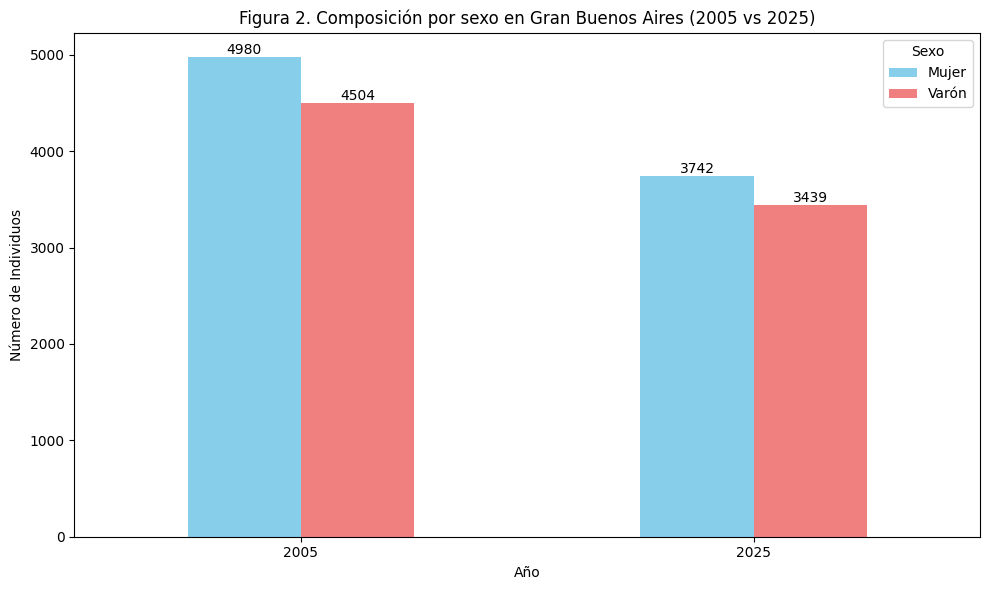

In [395]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Paso 1: Filtrar los datos para los años 2005 y 2025
df_filtered_years = df_comp[df_comp['ANO4'].isin([2005, 2025])].copy()

# Paso 2: Asignamos códigos numéricos de sexo a etiquetas descriptivas
sex_mapping = {1: 'Varón', 2: 'Mujer'}
df_filtered_years['SEXO_DESC'] = df_filtered_years['CH04'].map(sex_mapping)

# Paso 3: Agrupamos por año y sexo, y contamos
sex_composition = df_filtered_years.groupby(['ANO4', 'SEXO_DESC']).size().unstack(fill_value=0)

# Paso 4: Creamos el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

sex_composition.plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral'])

# Agregamos título y etiquetas
ax.set_title("Figura 2. Composición por sexo en Gran Buenos Aires (2005 vs 2025)")
ax.set_xlabel("Año")
ax.set_ylabel("Número de Individuos")
ax.tick_params(axis='x', rotation=0)

# Añadimos las etiquetas de datos a las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# agregamos leyenda
ax.legend(title="Sexo")



plt.tight_layout()
plt.show()

###ejercicio 4

In [396]:
#Filtramos el marco de datos combinado df_comp para incluir solo los años 2005 y 2025.

df_filtered_years = df_comp[df_comp['ANO4'].isin([2005, 2025])].copy()
display(df_filtered_years.head())

,CODUSU,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,PP10A,PP03J,PP04A,P21,P47T,ITF,IPCF
0,125098,1,2005,1,80,4,1,3,3,1,0,0,0,0,583,583,583
1,125188,1,2005,1,26,2,4,4,1,0,0,1,2,300,450,450,150
2,125188,1,2005,2,27,2,4,6,3,4,0,0,0,0,0,450,150
3,125188,1,2005,2,-1,5,4,7,4,5,0,0,0,0,0,450,150
4,125242,1,2005,2,71,4,1,2,3,1,0,0,0,0,855,855,855


In [397]:
#Seleccionamos las variables especificadas ( CH04, CH06, CH07, CH08, NIVEL_ED, ESTADO, CAT_INAC, IPCF) del marco de datos filtrado.

correlation_variables = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
df_correlation_subset = df_filtered_years[correlation_variables].copy()
display(df_correlation_subset.head())

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF
0,1,80,4,1,3,3,1,583
1,1,26,2,4,4,1,0,150
2,2,27,2,4,6,3,4,150
3,2,-1,5,4,7,4,5,150
4,2,71,4,1,2,3,1,855


In [398]:
#Creamos variables dummies para las variables categóricas entre las seleccionadas ( CH04, CH07, CH08, NIVEL_ED, ESTADO, CAT_INAC)

categorical_cols = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC']
df_dummies = pd.get_dummies(df_correlation_subset, columns=categorical_cols, drop_first=True)
display(df_dummies.head())

,CH06,IPCF,CH04_2,CH07_1,CH07_2,CH07_3,CH07_4,CH07_5,CH08_2,CH08_3,...,ESTADO_2,ESTADO_3,ESTADO_4,CAT_INAC_1,CAT_INAC_2,CAT_INAC_3,CAT_INAC_4,CAT_INAC_5,CAT_INAC_6,CAT_INAC_7
0,80,583,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,26,150,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,27,150,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
3,-1,150,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
4,71,855,True,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [399]:
#Combinamos variables numéricas y dummies

#Concatenamos las variables numéricas ( CH06, IPCF) con las variables dummies almacenadas en df_dummies

numerical_cols = ['CH06', 'IPCF']
df_numerical = df_correlation_subset[numerical_cols]
df_combined = pd.concat([df_numerical, df_dummies], axis=1)
display(df_combined.head())

,CH06,IPCF,CH06,IPCF,CH04_2,CH07_1,CH07_2,CH07_3,CH07_4,CH07_5,...,ESTADO_2,ESTADO_3,ESTADO_4,CAT_INAC_1,CAT_INAC_2,CAT_INAC_3,CAT_INAC_4,CAT_INAC_5,CAT_INAC_6,CAT_INAC_7
0,80,583,80,583,False,False,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,26,150,26,150,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,27,150,27,150,True,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
3,-1,150,-1,150,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,71,855,71,855,True,False,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False


In [400]:
#Calculamos la matriz de correlación para el marco de datos combinado df_combined.

correlation_matrix = df_combined.corr()
display(correlation_matrix.head())

,CH06,IPCF,CH06,IPCF,CH04_2,CH07_1,CH07_2,CH07_3,CH07_4,CH07_5,...,ESTADO_2,ESTADO_3,ESTADO_4,CAT_INAC_1,CAT_INAC_2,CAT_INAC_3,CAT_INAC_4,CAT_INAC_5,CAT_INAC_6,CAT_INAC_7
CH06,1.000000,0.079665,1.000000,0.079665,0.065244,0.085197,0.443055,0.169480,0.394953,-0.713583,...,-0.019442,0.168690,-0.536332,0.521189,0.048002,-0.515116,0.190442,-0.413072,0.050333,0.019895
IPCF,0.079665,1.000000,0.079665,1.000000,-0.018055,0.054856,-0.025370,0.020300,-0.005159,-0.022767,...,-0.061180,-0.036780,-0.056167,0.024156,0.028967,-0.036778,-0.049813,-0.051263,0.008103,-0.021079
CH06,1.000000,0.079665,1.000000,0.079665,0.065244,0.085197,0.443055,0.169480,0.394953,-0.713583,...,-0.019442,0.168690,-0.536332,0.521189,0.048002,-0.515116,0.190442,-0.413072,0.050333,0.019895
IPCF,0.079665,1.000000,0.079665,1.000000,-0.018055,0.054856,-0.025370,0.020300,-0.005159,-0.022767,...,-0.061180,-0.036780,-0.056167,0.024156,0.028967,-0.036778,-0.049813,-0.051263,0.008103,-0.021079
CH04_2,0.065244,-0.018055,0.065244,-0.018055,1.000000,-0.019879,-0.026781,0.067759,0.146580,-0.061324,...,-0.004793,0.180982,-0.015559,0.049168,0.013568,-0.019218,0.262494,-0.012963,-0.008247,0.001904


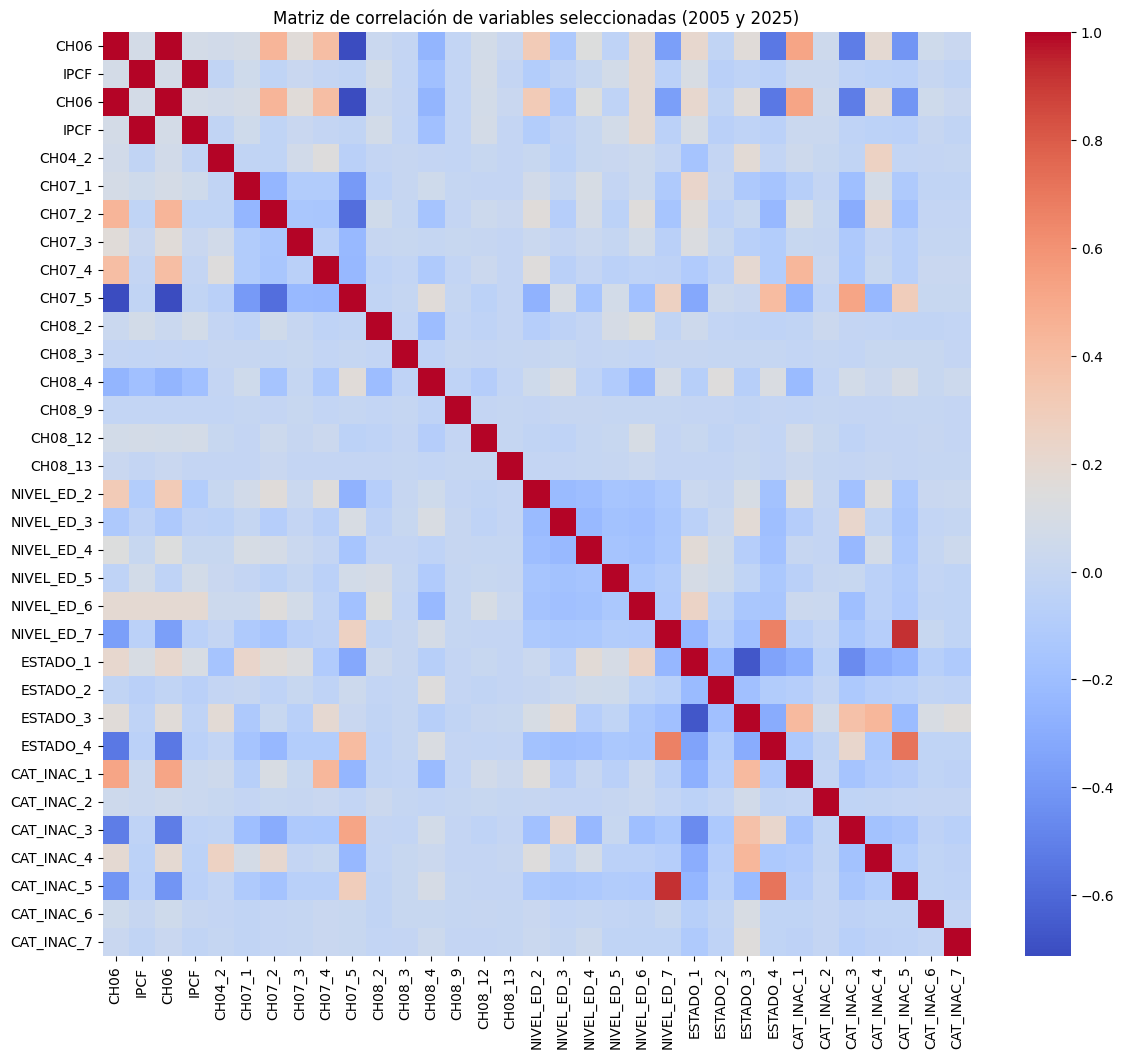

In [401]:
#Generamos un mapa de calor de la matriz de correlación

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Matriz de correlación de variables seleccionadas (2005 y 2025)")
plt.show()

##Parte 3

In [402]:
# Cargamos los datos de la tabla de adulto equivalente
adult_equiv = pd.read_excel("tabla_adulto_equiv.xlsx")
# Nos quedamos con las filas que contienen los datos utiles
adult_equiv1 = adult_equiv.loc[4:26].reset_index(drop=True)
# Armamos la variable para realizar la equivalencia entre la base de la eph y los coeficientes de la tabla de adulto equivalente
adult_equiv1["edad"] = adult_equiv1["Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad"].str[:2] # Extraemos la edad
adult_equiv1.at[0, "edad"] = 0 # Corregimos a mano los valores que hacen falta
adult_equiv1.at[1, "edad"] = 1
adult_equiv1.at[22, "edad"] = 76
adult_equiv1 = adult_equiv1.rename(columns={"Unnamed: 1": "coef_ch04_2","Unnamed: 2": "coef_ch04_1"})
adult_equiv1['edad'] = adult_equiv1['edad'].astype(int) # Cambiamos el tipo de dato
adult_equiv1["edad1"] = adult_equiv1["edad"].shift(-1, fill_value=121) -1 # Columna auxiliar
# Creamos una tabla con todas las edades y los coeficientes asociados para varón y mujer
rows = []
for _, row in adult_equiv1.iterrows():
    for edad in range(int(row["edad"]), int(row["edad1"]) + 1):
        rows.append({
            "edad": edad,
            "coef_ch04_2": row["coef_ch04_2"],
            "coef_ch04_1": row["coef_ch04_1"]
        })
equivalencia = pd.DataFrame(rows)
equivalencia_largo = pd.concat([ # Pivotamos la tabla y renombramos las columnas para que coincida con df_comp
    equivalencia[["edad", "coef_ch04_1"]].rename(columns={"coef_ch04_1": "adulto_equiv"}).assign(CH04=1),
    equivalencia[["edad", "coef_ch04_2"]].rename(columns={"coef_ch04_2": "adulto_equiv"}).assign(CH04=2)
], ignore_index=True)
equivalencia_largo.rename(columns={"edad": "CH06"}, inplace=True)

# Realizamos la unión de los datos de la eph con los coeficientes correspondientes
df_comp1 = df_comp.merge(
    equivalencia_largo,
    how="left",
    on=["CH06", "CH04"]
)
# Comprobamos que la unión se haya realizado correctamente
print("df_comp shape:", df_comp.shape)
print("no respondieron shape:", df_comp1.shape)

### FALTA DE RESPUESTA
# Separamos la base de datos entre los que respondieron y no respondieron ingreso familiar
norespondieron = df_comp1[df_comp1["ITF"] == 0]
print("no respondieron shape:",norespondieron.shape)
respondieron = df_comp1[df_comp1["ITF"] != 0]
print("respondieron shape:", respondieron.shape)
# Continuamos trabajando con la base respondieron

### MEDICIÓN DE POBREZA
# Vemos si tenemos coeficientes faltantes para algunas observaciones
print("coeficientes nulos: ", respondieron["adulto_equiv"].isna().sum())
print("Base con coeficientes nulos: \n", respondieron[respondieron["adulto_equiv"].isna()])
# Vemos que existen 161 casos fallidos que se corresponden con un CH06 = -1, utilizado para marcar la ausencia de respuesta
res_group_nan = respondieron.groupby("CODUSU")["adulto_equiv"].transform(lambda x: x.isna().any()) # Marcamos los hogares que tienen algún miembro sin coeficiente asociado (máscara booleana)
respondieron1 = respondieron[~res_group_nan] # Nos quedamos con los hogares que no tienen individuos sin coeficiente
# Corroboramos que haya funcionado bien
print("coeficientes nulos: ", respondieron1["adulto_equiv"].isna().sum())
print("respondieron1 shape:", respondieron1.shape)
# Nos quedamos con 12866 observaciones


FileNotFoundError: [Errno 2] No such file or directory: 'tabla_adulto_equiv.xlsx'